# Introdução ao Scikit-learn (Classificadores)

<img src="img\scikit_learn.png" alt="drawing" width="300"/>

O scikit-learn é uma poderosa ferramenta para aprendizado de máquina em python de código aberto (open source) e pode ser usado comercialmente (licença BSD). Construído sobre as bibliotecas NumPy, SciPy e matplotlib, possui ferramentas simples e eficientes para mineração e análise de dados, sendo uma biblioteca acessível e reutilizável em vários contextos.

#### O scikit-learn requer python (> = 3.5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
heart = pd.read_csv('../../scr/datasets/heart.csv', index_col=0)

In [3]:
heart.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'Thal_fixed', 'Thal_normal', 'HeartDisease'],
      dtype='object')

In [4]:
len(heart)

297

In [5]:
heart.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal,HeartDisease
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,1,0,No
1,67,1,160,286,0,2,108,1,1.5,2,3,1,0,0,1,Yes
2,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,Yes
3,37,1,130,250,0,0,187,0,3.5,3,0,0,1,0,1,No
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,0,1,No


In [6]:
print("Proporção de doentes e não doentes: ")

doentes = len(heart[heart["HeartDisease"]=="Yes"])/len(heart)
nao_doentes = len(heart[heart["HeartDisease"]=="No"])/len(heart)
print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.4612794612794613
	 - Não Doentes: 0.5387205387205387


## Treino e Teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
explicativa = heart.drop(["HeartDisease"], axis=1) # Retirando a coluna com os rótulos
resposta = heart["HeartDisease"]                   # Criando objeto apenas com os rótulos 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(explicativa, 
                                                    resposta, 
                                                    test_size=0.3, 
                                                    stratify=resposta)

In [10]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
287,44,1,120,169,0,0,144,1,2.8,3,0,1,0,1,0
282,58,0,170,225,1,2,146,1,2.8,2,2,1,0,1,0
273,39,0,138,220,0,0,152,0,0.0,2,0,0,1,0,1
12,56,1,130,256,1,2,142,1,0.6,2,1,0,1,1,0
186,54,1,192,283,0,2,195,0,0.0,1,1,0,0,0,0


In [11]:
X_test.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
274,57,1,154,232,0,2,164,0,0.0,1,1,0,0,0,1
250,51,0,120,295,0,2,157,0,0.6,1,0,0,1,0,1
177,53,1,130,246,1,2,173,0,0.0,1,3,0,1,0,1
212,56,1,120,193,0,2,162,0,1.9,2,0,0,0,0,0
24,60,1,130,206,0,2,132,1,2.4,2,2,1,0,0,0


In [12]:
y_train.head()

287    Yes
282    Yes
273     No
12     Yes
186    Yes
Name: HeartDisease, dtype: object

In [13]:
y_test.head()

274    Yes
250     No
177     No
212     No
24     Yes
Name: HeartDisease, dtype: object

Verificando se as propoções permanacem iguais.

In [14]:
print("Proporção de doentes e não doentes: ")
doentes = len(y_train[y_train=="Yes"])/len(y_train)
nao_doentes = len(y_train[y_train=="No"])/len(y_train)

print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.45893719806763283
	 - Não Doentes: 0.5410628019323671


## Modelos

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [16]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8555555555555555

In [17]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5333333333333333

In [18]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8111111111111111

## Avaliação do modelo

### Matriz de confusão

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)/len(y_test)
pd.DataFrame(cm)

,0,1
0,0.444444,0.088889
1,0.055556,0.411111


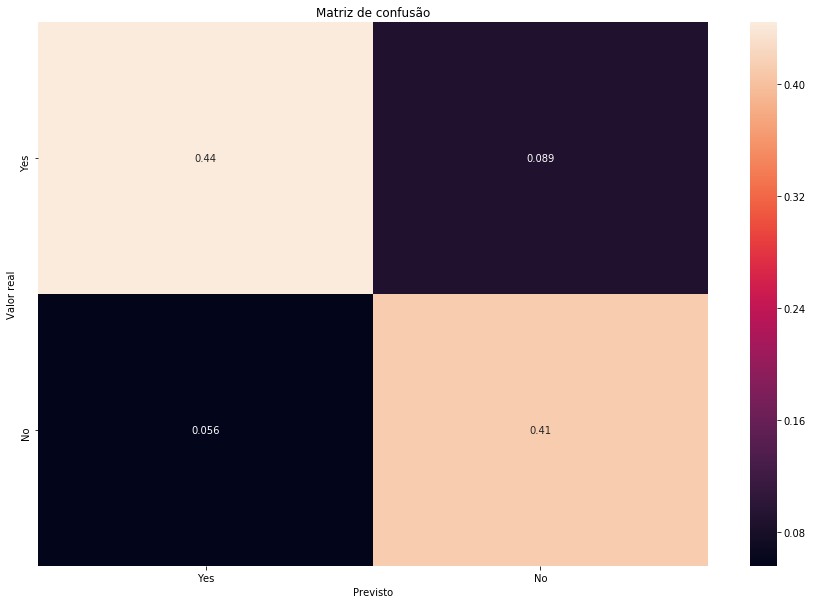

In [21]:
plt.figure(figsize=(15, 10))
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Previsto');ax.set_ylabel('Valor real'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(y_test.unique()); ax.yaxis.set_ticklabels(y_test.unique());
plt.show()

### Métricas da matriz de confusão

In [29]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, classification_report

#kappa    
print(cohen_kappa_score(y_test, y_pred))
#Acurácia
print(accuracy_score(y_test,y_pred))
###########
print(classification_report(y_test,y_pred))



0.7111111111111111
0.8555555555555555
              precision    recall  f1-score   support

          No       0.89      0.83      0.86        48
         Yes       0.82      0.88      0.85        42

   micro avg       0.86      0.86      0.86        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.86      0.86      0.86        90



In [24]:
# Creating a function to report confusion metrics
def medidas_mc (mc):
    VP = mc[1][1]
    VN = mc[0][0]
    FP = mc[0][1]
    FN = mc[1][0]
    print('Verdadeiros Positivos:', VP)
    print('Verdadeiros Negativos:', VN)
    print('Falsos Positivos:', FP)
    print('Falsos Negativos:', FN)
    
    # Calcula acurácia 
    conf_acuracia = (float (VP+VN) / float(VP + VN + FP + FN))
    
    # Calcula classificações incorretas
    conf_classificoes_incorretas= 1- conf_acuracia
    
    # Calcula sensibilidade
    conf_sensibilidade = (VP / float(VP + FN))
    # Calcula especificidade
    conf_especificidade = (VN / float(VN + FP))
    
    # Calcula precisão
    conf_precisao = (VN / float(VN + FP))
    # Calcula f_1 score
    conf_f1 = 2 * ((conf_precisao * conf_sensibilidade) / (conf_precisao + conf_sensibilidade))
    print('-'*50)
    print(f'Acurácia: {round(conf_acuracia,4)}') 
    print(f'Classificações-Incorretas: {round(conf_classificoes_incorretas,4)}') 
    print(f'Sensibilidade: {round(conf_sensibilidade,4)}') 
    print(f'Especificidade: {round(conf_especificidade,4)}') 
    print(f'Precisão: {round(conf_precisao,4)}')
    print(f'f_1 Score: {round(conf_f1,4)}')
    
    
confusion_metrics(cm)

Verdadeiros Positivos: 0.4111111111111111
Verdadeiros Negativos: 0.4444444444444444
Falsos Positivos: 0.08888888888888889
Falsos Negativos: 0.05555555555555555
--------------------------------------------------
Acurácia: 0.8556
Classificações-Incorretas: 0.1444
Sensibilidade: 0.881
Especificidade: 0.8333
Precisão: 0.8333
f_1 Score: 0.8565


## Kfold e Kfold Estratificado

In [23]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [24]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [25]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(explicativa, resposta):
    
    X_train = explicativa.iloc()[train_index].values
    X_test = explicativa.iloc()[test_index].values
    y_train = resposta.iloc()[train_index].dropna()
    y_test = resposta.iloc()[test_index].dropna()

    logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr')
    svc = SVC(gamma='auto')
    random_florest = RandomForestClassifier(n_estimators=40)
    
    scores_logistic.append(get_score(logistic_regression, X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(svc, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(random_florest, X_train, X_test, y_train, y_test))

In [26]:
from statistics import mean

In [27]:
mean(scores_logistic)

0.8315694358551501

In [28]:
mean(scores_svm)

0.5421246478389335

In [29]:
mean(scores_rf)

0.8182024324881468

## Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), 
                explicativa, 
                resposta,cv=3)

array([0.83      , 0.85858586, 0.80612245])

In [32]:
cross_val_score(SVC(gamma='auto'), 
                explicativa, 
                resposta,cv=3)

array([0.54      , 0.53535354, 0.55102041])

In [33]:
cross_val_score(RandomForestClassifier(n_estimators=40), 
                explicativa, 
                resposta,cv=3)

array([0.82      , 0.80808081, 0.78571429])